# MMAI 894 - Deep Learning
## Dr. Ofer Shai
## Team Bloor
### Pothole Detection Model
Benchmark Model - AlexNet


### 1. Import Modules and Libraries

In [ ]:
# Install module for importing Keras Tuner

!pip install -q -U keras-tuner

In [ ]:
# Import modules
from sklearn.datasets import fetch_openml
import numpy as np
from numpy import expand_dims
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import os
import random as rn
import cv2
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from keras.utils.np_utils import to_categorical
import kerastuner as kt

np.random.seed(123)
tf.random.set_seed(123)

### 2. Load Data


*   Data is loaded from Dropbox
*   There are two (2) datasets that will be uploaded as zipped files and then unzipped in this notebook



In [ ]:
!wget https://www.dropbox.com/s/u6ymk5ylk9axsuw/no_pothole_v2.zip?dl=0

--2021-03-28 22:41:02--  https://www.dropbox.com/s/u6ymk5ylk9axsuw/no_pothole_v2.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u6ymk5ylk9axsuw/no_pothole_v2.zip [following]
--2021-03-28 22:41:02--  https://www.dropbox.com/s/raw/u6ymk5ylk9axsuw/no_pothole_v2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2016d1861ce4131742e73efc26.dl.dropboxusercontent.com/cd/0/inline/BLlBQZwBESIIP2fZrAM5MciUO2ekQ-bE-zYqFwF2N_U_MpvbC9kommHnEYbCBl3_eLOjvGB8qGSBpAt2BlwKnJlKFWQsAZGWSHnVPpzMvpXKjsN9rx8I4XzqyYAZZEGYMJy1ZuAeA1jCbQEj70Tuus4_/file# [following]
--2021-03-28 22:41:02--  https://uc2016d1861ce4131742e73efc26.dl.dropboxusercontent.com/cd/0/inline/BLlBQZwBESIIP2fZrAM5MciUO2ekQ-bE-zYqFwF2N_U_MpvbC9kommHnEYbCBl3_eLO

In [ ]:
!wget https://www.dropbox.com/s/edhsf4jxdwdbddz/potholes.zip?dl=0

--2021-03-28 22:41:10--  https://www.dropbox.com/s/edhsf4jxdwdbddz/potholes.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/edhsf4jxdwdbddz/potholes.zip [following]
--2021-03-28 22:41:10--  https://www.dropbox.com/s/raw/edhsf4jxdwdbddz/potholes.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccdeaa60d9a3de1adf98fa8770e.dl.dropboxusercontent.com/cd/0/inline/BLkuJyavOish1-TNEOYzbjJgZd2_cVTHKIWvapviA20A1lqtz3_0HIy3ywWSjCFtLNoh9a2OpkxcWUXs0YGmYe21pA0634Xenu-O80SMZYwm9TDGbE3Dc48GujaczkL81QZGV8lqN0cKbl0ZcNbHHaM7/file# [following]
--2021-03-28 22:41:11--  https://uccdeaa60d9a3de1adf98fa8770e.dl.dropboxusercontent.com/cd/0/inline/BLkuJyavOish1-TNEOYzbjJgZd2_cVTHKIWvapviA20A1lqtz3_0HIy3ywWSjCFtLNoh9a2OpkxcWUXs0Y

In [ ]:
# Unzip the No Potholes dataset
# Use '%%capture' to hide output

%%capture
!unzip -o '/content/no_pothole_v2.zip?dl=0'

In [ ]:
# Unzip the Potholes dataset
# Use '%%capture' to hide output

%%capture
!unzip -o '/content/potholes.zip?dl=0'

### 3. Data Preprocessing

The following steps will be taken to preprocess the data:
1.   Read in the images from the datasets and resize them
2.   Assign each image a label (i.e. No Pothole vs Pothole)
3.   Plot sample images to assure the labels have been assigned correctly
4.   Encode the labels
5. Split the data into training and test sets



In [ ]:
# This function reads in the images one at a time through the 'for' loop and resizes them and assigns a label

def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass

In [ ]:
# Running the 'make_train_data' function defined above on the two (2) datasets
# X will be a list of images, stored as an array
# Z will be a list of labels 

X=[]
Z=[]
IMG_SIZE=250

no_potholes='../content/no_pothole_v2/'
potholes='../content/potholes/'

make_train_data('NO POTHOLES',no_potholes)
make_train_data('POTHOLES',potholes)

100%|██████████| 718/718 [00:07<00:00, 97.62it/s]


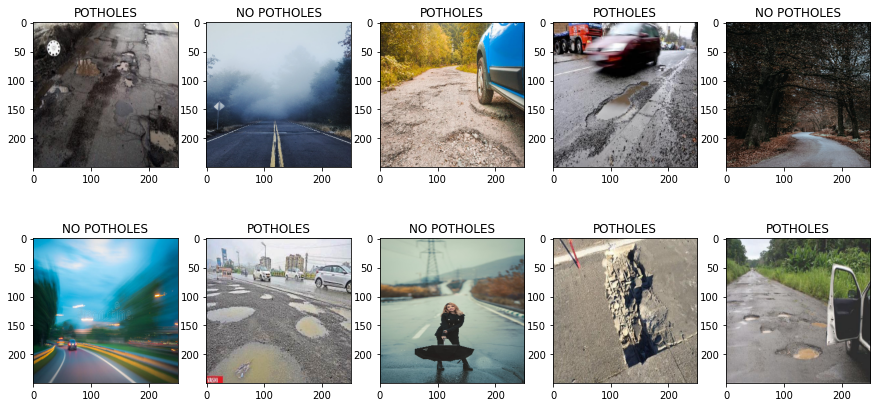

In [ ]:
# Plotting ten (10) randomly selected images, along with their assigned labels as the title

fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [ ]:
# Encoding the labels and assigning the encoded labels to 'Y'

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(Z)

print(Y)

X=np.array(X)

# Split data into training and test sets
# Assigning 15% of the data to the test sets and remaining to the training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state=42)

[0 0 0 ... 1 1 1]


In [ ]:
# Printing shapes of X, X_train, and X_test to assure the split was done correctly

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1534, 250, 250, 3)
(1107, 250, 250, 3)
(231, 250, 250, 3)
(196, 250, 250, 3)


### 4. Modelling - Training and Building Model


*   Building the model based on the AlexNet architecture



In [ ]:
# Building model inside a 'model_builder' function, which will be used in the hyperparameter tuner

model = Sequential()

# First convolution layer
model.add(Conv2D(filters = 96, kernel_size = (11,11), strides=(4,4), padding = 'valid', activation ='relu', input_shape = (250, 250, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Second convolution layer
model.add(Conv2D(filters = 256, kernel_size = (5,5), strides=(1,1), padding = 'same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Third convolution layer
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides=(1,1), padding = 'same', activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fourth convolution layer
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides=(1,1), padding = 'same', activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fifth convolution layer
model.add(Conv2D(filters = 256, kernel_size = (3,3), strides=(1,1), padding = 'same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())

# First dense layer
model.add(Dense(units=4096, input_shape = (250*250*3,), activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
  
# Second dense layer
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Third dense layer
model.add(Dense(units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Output layer
model.add(Dense(1,  activation = "sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 60, 60, 96)        34944     
_________________________________________________________________
batch_normalization_8 (Batch (None, 60, 60, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 256)       614656    
_________________________________________________________________
batch_normalization_9 (Batch (None, 29, 29, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 384)      

In [ ]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
# Train model

history = model.fit(x=X_train, y=Y_train, batch_size=64, epochs=20, verbose=1,validation_data=(X_val, Y_val))

Epoch 1/20
18/18 [==============================] - 3s 50ms/step - loss: 0.8484 - accuracy: 0.5646 - val_loss: 1.0050 - val_accuracy: 0.5663
Epoch 2/20
18/18 [==============================] - 1s 37ms/step - loss: 0.6563 - accuracy: 0.7183 - val_loss: 0.6821 - val_accuracy: 0.5357
Epoch 3/20
18/18 [==============================] - 1s 36ms/step - loss: 0.5008 - accuracy: 0.7811 - val_loss: 0.6349 - val_accuracy: 0.7143
Epoch 4/20
18/18 [==============================] - 1s 37ms/step - loss: 0.4366 - accuracy: 0.8076 - val_loss: 0.7700 - val_accuracy: 0.5612
Epoch 5/20
18/18 [==============================] - 1s 36ms/step - loss: 0.4764 - accuracy: 0.7813 - val_loss: 1.1313 - val_accuracy: 0.4541
Epoch 6/20
18/18 [==============================] - 1s 36ms/step - loss: 0.3919 - accuracy: 0.8449 - val_loss: 0.8935 - val_accuracy: 0.4898
Epoch 7/20
18/18 [==============================] - 1s 36ms/step - loss: 0.3630 - accuracy: 0.8501 - val_loss: 0.9194 - val_accuracy: 0.5000
Epoch 8/20
18

### 5. Model Evaluation

In [ ]:
# Evaluate model
# This model has trained on the full 50 epochs

test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print("Test Loss: {:.3f}, Test Accuracy: {:.3f}".format(test_loss, test_accuracy))


8/8 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.8182
Test Loss: 0.691, Test Accuracy: 0.818


In [ ]:
# Generate Classification Report
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

target_names = ['No Pothole', 'Pothole']

print(classification_report(Y_test, y_pred.round(), target_names=target_names))

              precision    recall  f1-score   support

  No Pothole       0.98      0.67      0.79       120
     Pothole       0.73      0.98      0.84       111

    accuracy                           0.82       231
   macro avg       0.85      0.82      0.82       231
weighted avg       0.86      0.82      0.81       231



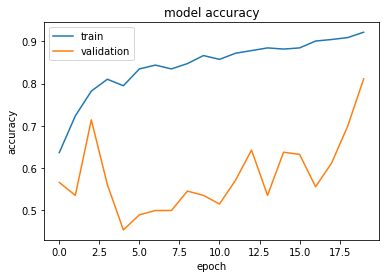

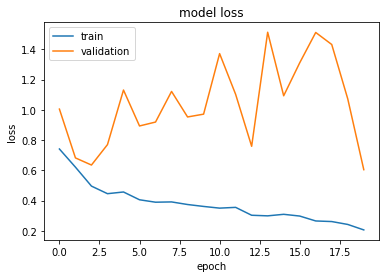

In [ ]:
# Plot training and validation accuracy and loss over epochs

#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

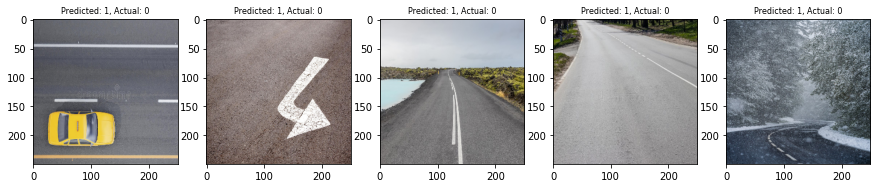

In [ ]:
# Plotting incorrect predictions

# Assigning the predicted and actual outputs to a class (0 or 1)
Y_pred_classes = y_pred.round()
Y_test_classes = Y_test.round()

# Creating a blank list for all incorrect predictions
inc_pred = []
    
# Comparing the predicted and actual outputs and adding the index of the incorrect predictions to the inc_pred list
for x in range(0,len(Y_pred_classes)):
  if Y_pred_classes[x] != Y_test_classes[x]:
    inc_pred.append(x)

# Creating a sample of the first five (5) incorrect predictions
inc_pred_sample = inc_pred[:5]
inc_pred_sample2 = inc_pred[5:10]

# Plotting the sample of five (5) incorrect predictions
n_plots = len(inc_pred_sample2)

f, ax2=plt.subplots(1, 5, figsize=(20,20))
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
f.set_size_inches(15,15)

for i in range(0,n_plots):
    value = X_test[inc_pred_sample2[i]][:,:,::-1]
    ax2[i].imshow(value.reshape(250,250,3))
    ax2[i].set_title("Predicted: {}, Actual: {}".format(int(Y_pred_classes[inc_pred_sample2[i]][0]),Y_test_classes[inc_pred_sample2[i]]), fontsize=8)
    ax2[i].set_aspect('equal')


# Extra Work - Remove before submission

In [ ]:
# import random image

# test_path = '../content/test_image13.jpg'

# test_img = cv2.imread(test_path,cv2.IMREAD_COLOR)
# test_img = cv2.resize(test_img, (IMG_SIZE,IMG_SIZE))

# fig1,ay=plt.subplots(1,1)
# plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
# fig1.set_size_inches(15,15)

# ay.imshow(test_img)

In [ ]:
# test_img_dim = expand_dims(test_img, axis=0)

# test_img_dim.shape

In [ ]:
# predict class of random image

# test_pred = hypermodel.predict(test_img_dim)

# print(test_pred)

# prediction = test_pred.round()

# print(prediction)

# if prediction == 0:
#   print("This image has no potholes")

# else:
#   print("This image has potholes")